### Importación de librerías

In [1]:
import numpy as np
from Utils import load_img,unet_segmenta, boxescount
import cv2
import matplotlib.pyplot as plt
import os
from tensorflow import keras

### Modelo de segmentación

1/1 [==============================] - 0s 36ms/step


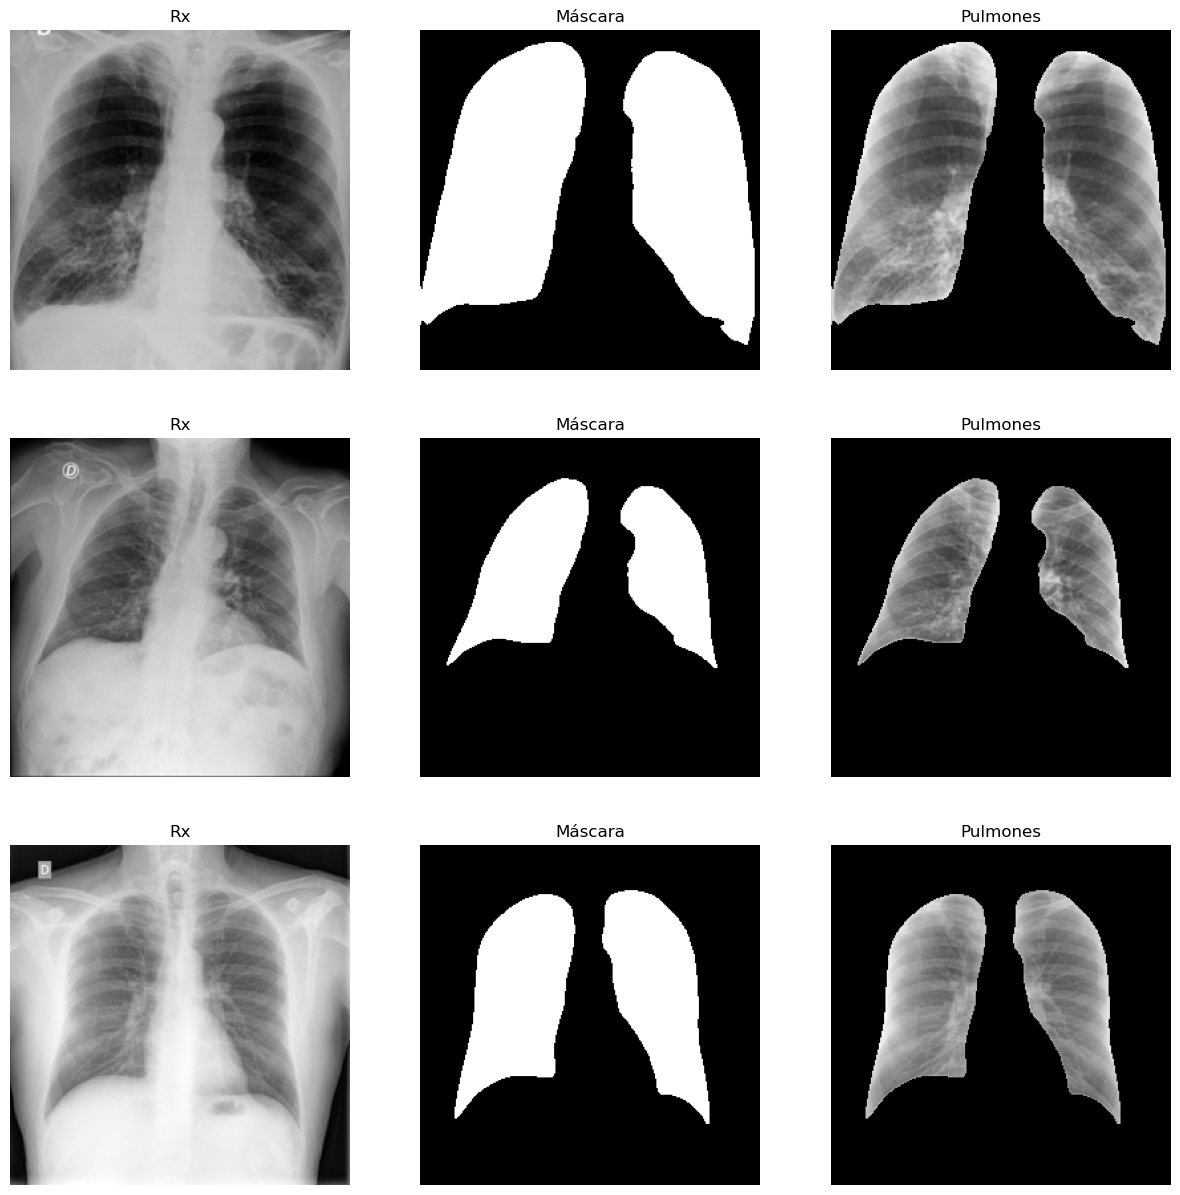

In [2]:
path_covid_origen = "Data_Source\COVID-QU-Ex dataset\Lung Segmentation Data\Lung Segmentation Data\Train\COVID-19\images"

model = unet_segmenta()
plt.figure(figsize=[15,15])

img_list = os.listdir(path_covid_origen)
for n in range(3):
    image_path = os.path.join(path_covid_origen,img_list[np.random.randint(0,len(img_list))])
    image = cv2.imread(image_path, 0)
    image = load_img(image)
    mask = model.predict(image)
    lungs = np.array(image[0,:,:,0])*255
    lungs[mask[0,:,:,0]<0.5] = 0

    plt.subplot( 3, 3, 1 + (n * 3))
    plt.title("Rx")
    plt.axis("off")
    plt.imshow(image[0,:,:,0],cmap="gray")

    plt.subplot( 3, 3, 2 + (n * 3))
    plt.title("Máscara")
    plt.axis("off")
    plt.imshow(mask[0,:,:,0]>0.5,cmap="gray")

    plt.subplot( 3, 3, 3 + (n * 3))
    plt.title("Pulmones")
    plt.axis("off")
    plt.imshow(lungs,cmap="gray")

plt.savefig("Images\lungs", bbox_inches='tight')


### Cajas dentro de pulmones

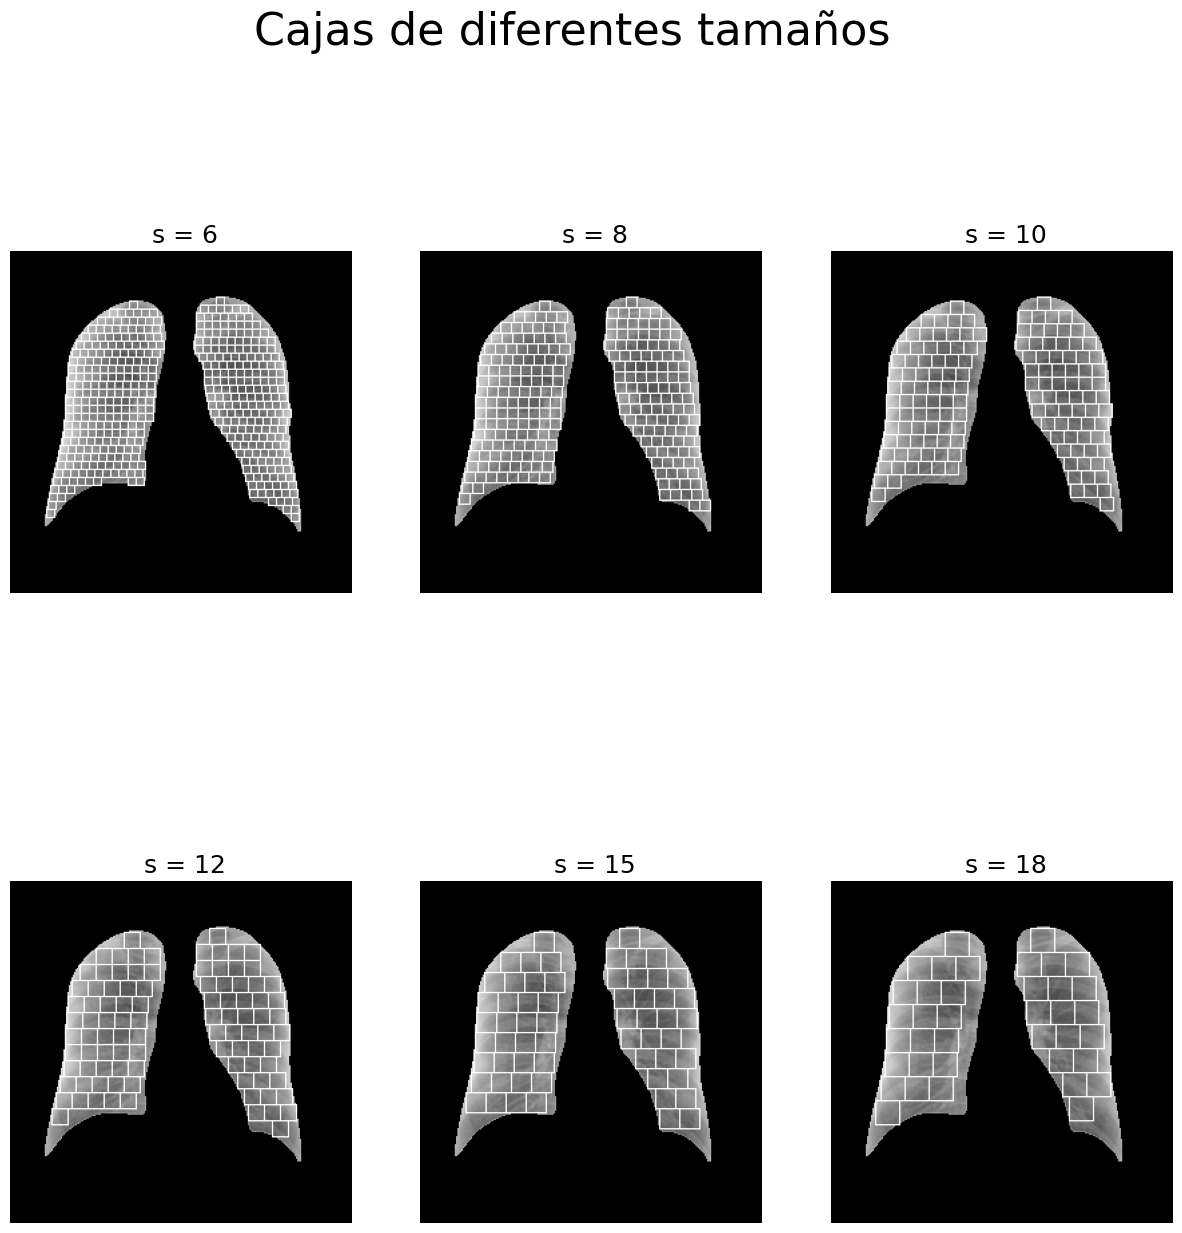

In [3]:
boxes = boxescount(lungs=lungs)
dic_boxes = boxes.dic_boxes()

plt.figure(figsize=[15,15])
plt.suptitle("Cajas de diferentes tamaños", fontsize = 32)
s = 5
for i in range(6):
    s = int(s * np.sqrt(np.sqrt(2)) ) + 1
    box_img = boxes.show_boxes(s, show=False)
    plt.subplot(2,3,i + 1)
    plt.axis("off")
    plt.title(f" s = {s}", fontsize = 18)
    plt.imshow(box_img, cmap="gray")
plt.savefig("Images\Boxes.png", bbox_inches='tight')

In [4]:
imgprueba = boxes.show_boxes(18,show=False)

(-0.5, 255.5, 255.5, -0.5)

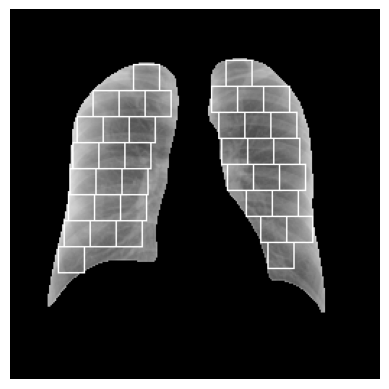

In [6]:
plt.imshow(imgprueba, cmap="gray")
plt.axis("off")

(-0.5, 17.5, 17.5, -0.5)

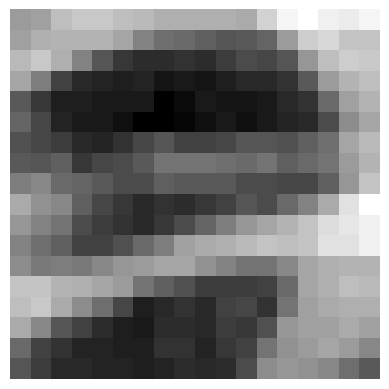

In [15]:
caja = dic_boxes["derecho"]["18"][0]
plt.imshow(caja, cmap="gray")
plt.axis("off")

In [17]:
def multidim_cumsum(a):
	out = a[...,:].cumsum(-1)[...,:]
	for i in range(2,a.ndim+1):
		np.cumsum(out, axis=-i, out=out)
	return out
caja_acumulada = multidim_cumsum(caja)

(-0.5, 17.5, 17.5, -0.5)

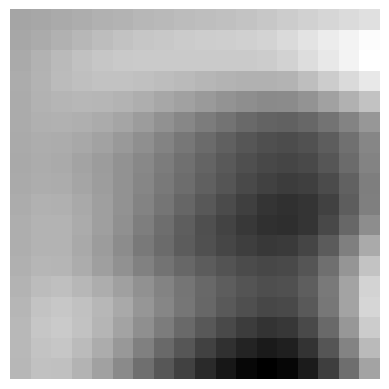

In [20]:
plt.imshow(caja_acumulada, cmap="gray")
plt.axis("off")

### Promedio de valores MF-MDF

In [21]:
def read(txt):
    promedios = []
    for line in txt:
        valor = ""
        valores = []
        for letter in line[:-1]:
            if letter != " ":
                valor += letter
            else:
                valores.append(float(valor))
                valor = ""
        valores.append(float(valor))
        promedios.append(valores)
    return np.array(promedios)

In [22]:
Average_COVID19_derecho = "Data\Average_MFMDA\Ave_MF_R_COVID-19_derecho.txt" 
Average_COVID19_izquierdo = "Data\Average_MFMDA\Ave_MF_R_COVID-19_izquierdo.txt"
Average_normal_derecho = "Data\Average_MFMDA\Ave_MF_R_Normal_derecho.txt" 
Average_normal_izquierdo = "Data\Average_MFMDA\Ave_MF_R_Normal_izquierdo.txt"
Average_nonCOVID19_derecho = "Data\Average_MFMDA\Ave_MF_R_Non-COVID-19_derecho.txt" 
Average_nonCOVID19_izquierdo = "Data\Average_MFMDA\Ave_MF_R_Non-COVID-19_izquierdo.txt"


In [23]:
COVID19_derecho = read(open(Average_COVID19_derecho, "r"))
COVID19_izquierdo = read(open(Average_COVID19_izquierdo, "r"))

Normal_derecho = read(open(Average_normal_derecho, "r"))
Normal_izquierdo = read(open(Average_normal_izquierdo, "r"))


NonCOVID19_derecho = read(open(Average_nonCOVID19_derecho, "r"))
NonCOVID19_izquierdo = read(open(Average_nonCOVID19_izquierdo, "r"))


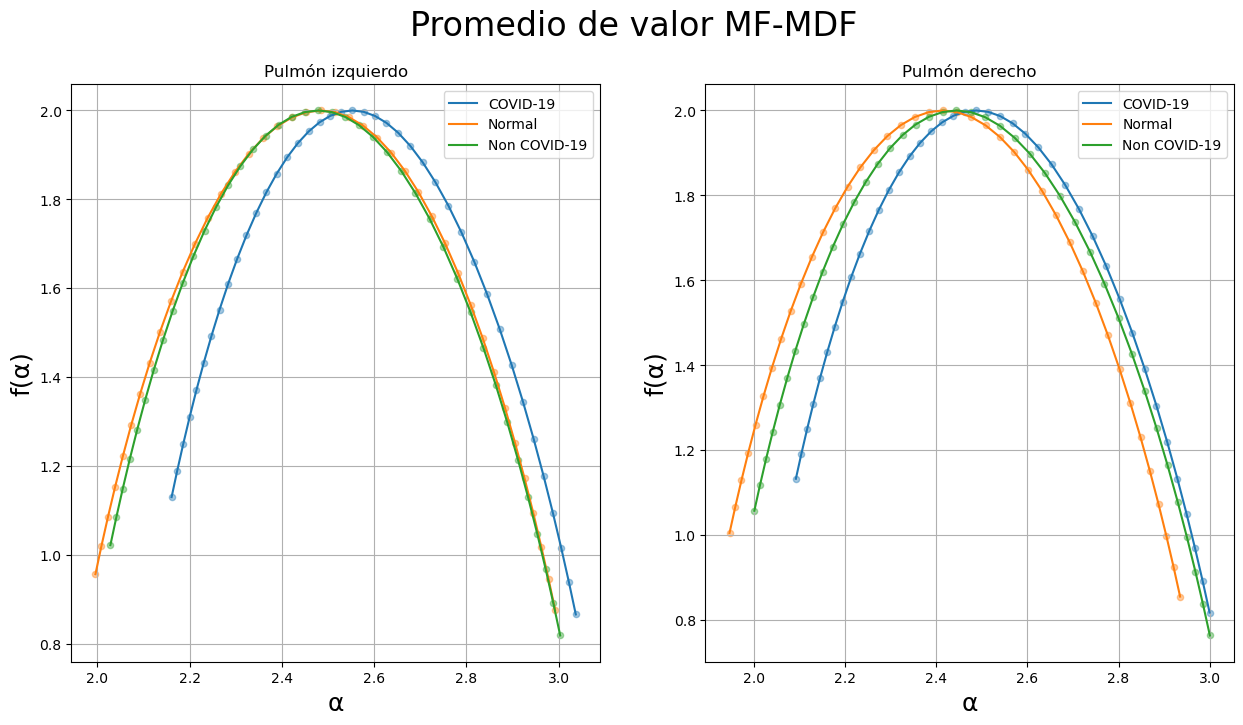

In [24]:
label = ["COVID-19","Normal","Non COVID-19"]

plt.figure(figsize=[15,7.5])
plt.suptitle("Promedio de valor MF-MDF", fontsize = 24)

plt.subplot(1,2,2)
plt.grid()
plt.title("Pulmón derecho")
plt.xlabel("α", fontsize=18)
plt.ylabel("f(α)", fontsize=18)

plt.plot(COVID19_derecho[:,0],COVID19_derecho[:,1])
plt.plot(Normal_derecho[:,0],Normal_derecho[:,1])
plt.plot(NonCOVID19_derecho[:,0],NonCOVID19_derecho[:,1])

plt.scatter(COVID19_derecho[:,0],COVID19_derecho[:,1],alpha = 0.4,s=20)
plt.scatter(Normal_derecho[:,0],Normal_derecho[:,1],alpha = 0.4,s=20)
plt.scatter(NonCOVID19_derecho[:,0],NonCOVID19_derecho[:,1],alpha = 0.4,s=20)

plt.legend(label)


plt.subplot(1,2,1)
plt.grid()
plt.title("Pulmón izquierdo")
plt.xlabel("α", fontsize=18)
plt.ylabel("f(α)", fontsize=18)

plt.plot(COVID19_izquierdo[:,0],COVID19_izquierdo[:,1])
plt.plot(Normal_izquierdo[:,0],Normal_izquierdo[:,1])
plt.plot(NonCOVID19_izquierdo[:,0],NonCOVID19_izquierdo[:,1])

plt.scatter(COVID19_izquierdo[:,0],COVID19_izquierdo[:,1],alpha = 0.4,s=20)
plt.scatter(Normal_izquierdo[:,0],Normal_izquierdo[:,1],alpha = 0.4,s=20)
plt.scatter(NonCOVID19_izquierdo[:,0],NonCOVID19_izquierdo[:,1],alpha = 0.4,s=20)

plt.legend(label)

plt.savefig("Images\Promedio_MF-MDF.png", bbox_inches='tight')


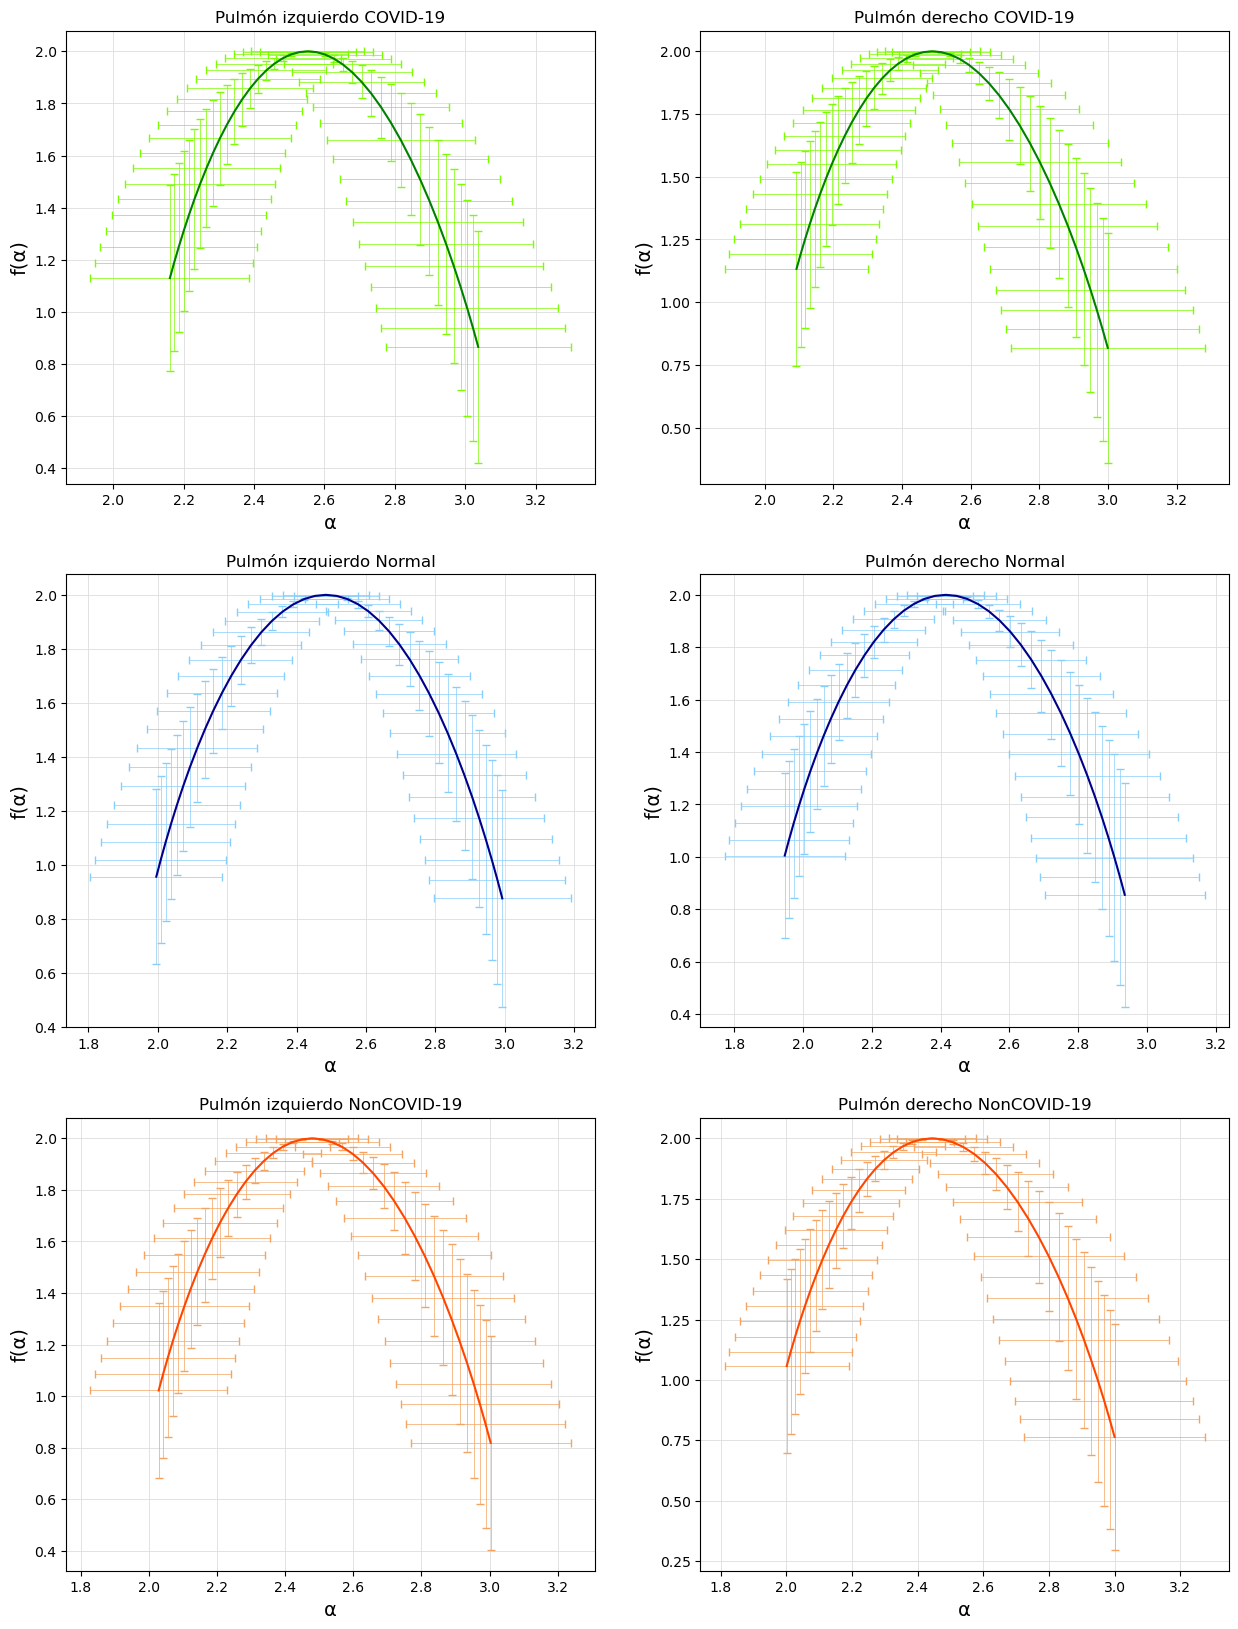

In [25]:
plt.figure(figsize=[15,20])

plt.subplot(3,2,1)
plt.grid(which='major', color='#DDDDDD', linewidth=0.6)
plt.title("Pulmón izquierdo COVID-19")
plt.xlabel("α", fontsize=14)
plt.ylabel("f(α)", fontsize=14)
plt.errorbar(COVID19_izquierdo[:,0],COVID19_izquierdo[:,1],COVID19_izquierdo[:,3],COVID19_izquierdo[:,2],elinewidth=0.5,capsize=3,ecolor="lawngreen", color = "green")
plt.subplot(3,2,2)
plt.grid(which='major', color='#DDDDDD', linewidth=0.6)
plt.title("Pulmón derecho COVID-19")
plt.xlabel("α", fontsize=14)
plt.ylabel("f(α)", fontsize=14)
plt.errorbar(COVID19_derecho[:,0],COVID19_derecho[:,1],COVID19_derecho[:,3],COVID19_derecho[:,2],elinewidth=0.5,capsize=3,ecolor="lawngreen",color = "green")

plt.subplot(3,2,3)
plt.grid(which='major', color='#DDDDDD', linewidth=0.6)
plt.title("Pulmón izquierdo Normal")
plt.xlabel("α", fontsize=14)
plt.ylabel("f(α)", fontsize=14)
plt.errorbar(Normal_izquierdo[:,0],Normal_izquierdo[:,1],Normal_izquierdo[:,3],Normal_izquierdo[:,2],elinewidth=0.5,capsize=3,ecolor="lightskyblue", color = "darkblue")
plt.subplot(3,2,4)
plt.grid(which='major', color='#DDDDDD', linewidth=0.6)
plt.title("Pulmón derecho Normal")
plt.xlabel("α", fontsize=14)
plt.ylabel("f(α)", fontsize=14)
plt.errorbar(Normal_derecho[:,0],Normal_derecho[:,1],Normal_derecho[:,3],Normal_derecho[:,2],elinewidth=0.5,capsize=3,ecolor="lightskyblue", color = "darkblue")

plt.subplot(3,2,5)
plt.grid(which='major', color='#DDDDDD', linewidth=0.6)
plt.title("Pulmón izquierdo NonCOVID-19")
plt.xlabel("α", fontsize=14)
plt.ylabel("f(α)", fontsize=14)
plt.errorbar(NonCOVID19_izquierdo[:,0],NonCOVID19_izquierdo[:,1],NonCOVID19_izquierdo[:,3],NonCOVID19_izquierdo[:,2],elinewidth=0.5,capsize=3,ecolor="sandybrown", color ="orangered")
plt.subplot(3,2,6)
plt.grid(which='major', color='#DDDDDD', linewidth=0.6)
plt.title("Pulmón derecho NonCOVID-19")
plt.xlabel("α", fontsize=14)
plt.ylabel("f(α)", fontsize=14)
plt.errorbar(NonCOVID19_derecho[:,0],NonCOVID19_derecho[:,1],NonCOVID19_derecho[:,3],NonCOVID19_derecho[:,2],elinewidth=0.5,capsize=3,ecolor="sandybrown", color ="orangered")

plt.savefig("Images\Errores_MF-MDF.png", bbox_inches='tight')

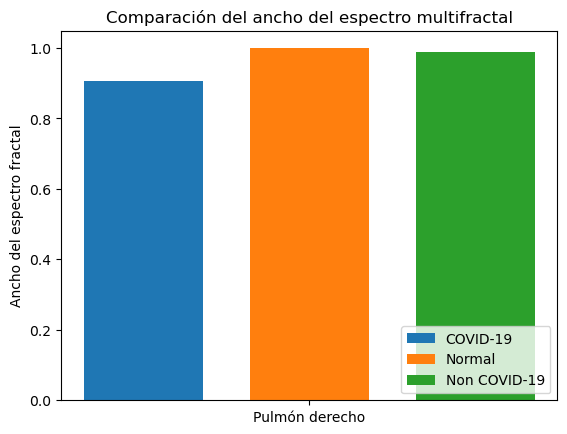

<Figure size 640x480 with 0 Axes>

In [35]:
ancho_espectro_covid = []
# ancho_espectro_covid.append(np.max(COVID19_izquierdo[:,0]) - np.min(COVID19_izquierdo[:,0]))
ancho_espectro_covid.append(np.max(COVID19_derecho[:,0]) - np.min(COVID19_derecho[:,0]))

ancho_espectro_nocovid = []
# ancho_espectro_nocovid.append(np.max(NonCOVID19_izquierdo[:,0]) - np.min(NonCOVID19_izquierdo[:,0]))
ancho_espectro_nocovid.append(np.max(NonCOVID19_derecho[:,0]) - np.min(NonCOVID19_derecho[:,0]))

ancho_espectro_normal = []
# ancho_espectro_normal.append(np.max(Normal_izquierdo[:,0]) - np.min(Normal_izquierdo[:,0]))
ancho_espectro_normal.append(np.max(Normal_derecho[:,0]) - np.min(Normal_derecho[:,0]))


# Datos para el gráfico
# categorias = ['Pulmón izquierdo', 'Pulmón derecho']
categorias = ['Pulmón derecho']
valores1 = ancho_espectro_covid
valores2 = ancho_espectro_nocovid
valores3 = ancho_espectro_normal

# Definir el ancho de las barras y el espacio entre ellas
ancho_barra = 0.20
espacio = 0.08

# Calcular la posición de las barras
posicion1 = np.arange(len(categorias))
posicion2 = [x + ancho_barra + espacio for x in posicion1]
posicion3 = [x + ancho_barra + espacio for x in posicion2]

# Crear el gráfico de barras
plt.figure()
plt.bar(posicion1, valores1, width=ancho_barra, label= label[0])
plt.bar(posicion2, valores2, width=ancho_barra, label= label[1])
plt.bar(posicion3, valores3, width=ancho_barra, label= label[2])

# Personalizar el gráfico
plt.ylabel('Ancho del espectro fractal')
plt.title('Comparación del ancho del espectro multifractal')
plt.xticks([r + ancho_barra + espacio for r in range(len(categorias))], categorias)
plt.legend(loc="lower right")


# Mostrar el gráfico
plt.show()

plt.savefig("Images\AnchoEspectros.png", bbox_inches='tight')

### Arquitectura U-Net

In [2]:
def down_block(x, filters, kernel_size=(3, 3), padding="same", strides=1):
    c = keras.layers.Conv2D(filters, kernel_size, padding=padding, strides=strides, activation="relu")(x)
    c = keras.layers.Conv2D(filters, kernel_size, padding=padding, strides=strides, activation="relu")(c)
    p = keras.layers.MaxPool2D((2, 2), (2, 2))(c)
    return c, p

def up_block(x, skip, filters, kernel_size=(3, 3), padding="same", strides=1):
    us = keras.layers.UpSampling2D((2, 2))(x)
    concat = keras.layers.Concatenate()([us, skip])
    c = keras.layers.Conv2D(filters, kernel_size, padding=padding, strides=strides, activation="relu")(concat)
    c = keras.layers.Conv2D(filters, kernel_size, padding=padding, strides=strides, activation="relu")(c)
    return c

def bottleneck(x, filters, kernel_size=(3, 3), padding="same", strides=1):
    c = keras.layers.Conv2D(filters, kernel_size, padding=padding, strides=strides, activation="relu")(x)
    c = keras.layers.Conv2D(filters, kernel_size, padding=padding, strides=strides, activation="relu")(c)
    return c
     

def UNet(image_size,f = [16, 32, 64, 128, 256], activation = 'sigmoid'):

    inputs = keras.layers.Input((image_size, image_size, 1))

    p0 = inputs
    c1, p1 = down_block(p0, f[0])  # 128 --> 64
    c2, p2 = down_block(p1, f[1])  # 64  --> 32
    c3, p3 = down_block(p2, f[2])  # 32  --> 16
    c4, p4 = down_block(p3, f[3])  # 16  --> 8

    bn = bottleneck(p4, f[4])

    u1 = up_block(bn, c4, f[3])  # 8  --> 16
    u2 = up_block(u1, c3, f[2])  # 16 --> 32
    u3 = up_block(u2, c2, f[1])  # 32 --> 64
    u4 = up_block(u3, c1, f[0])  # 64 --> 128

    outputs = keras.layers.Conv2D(1, (1, 1), padding="same", activation= activation)(u4)
    model = keras.models.Model(inputs, outputs)
    return model

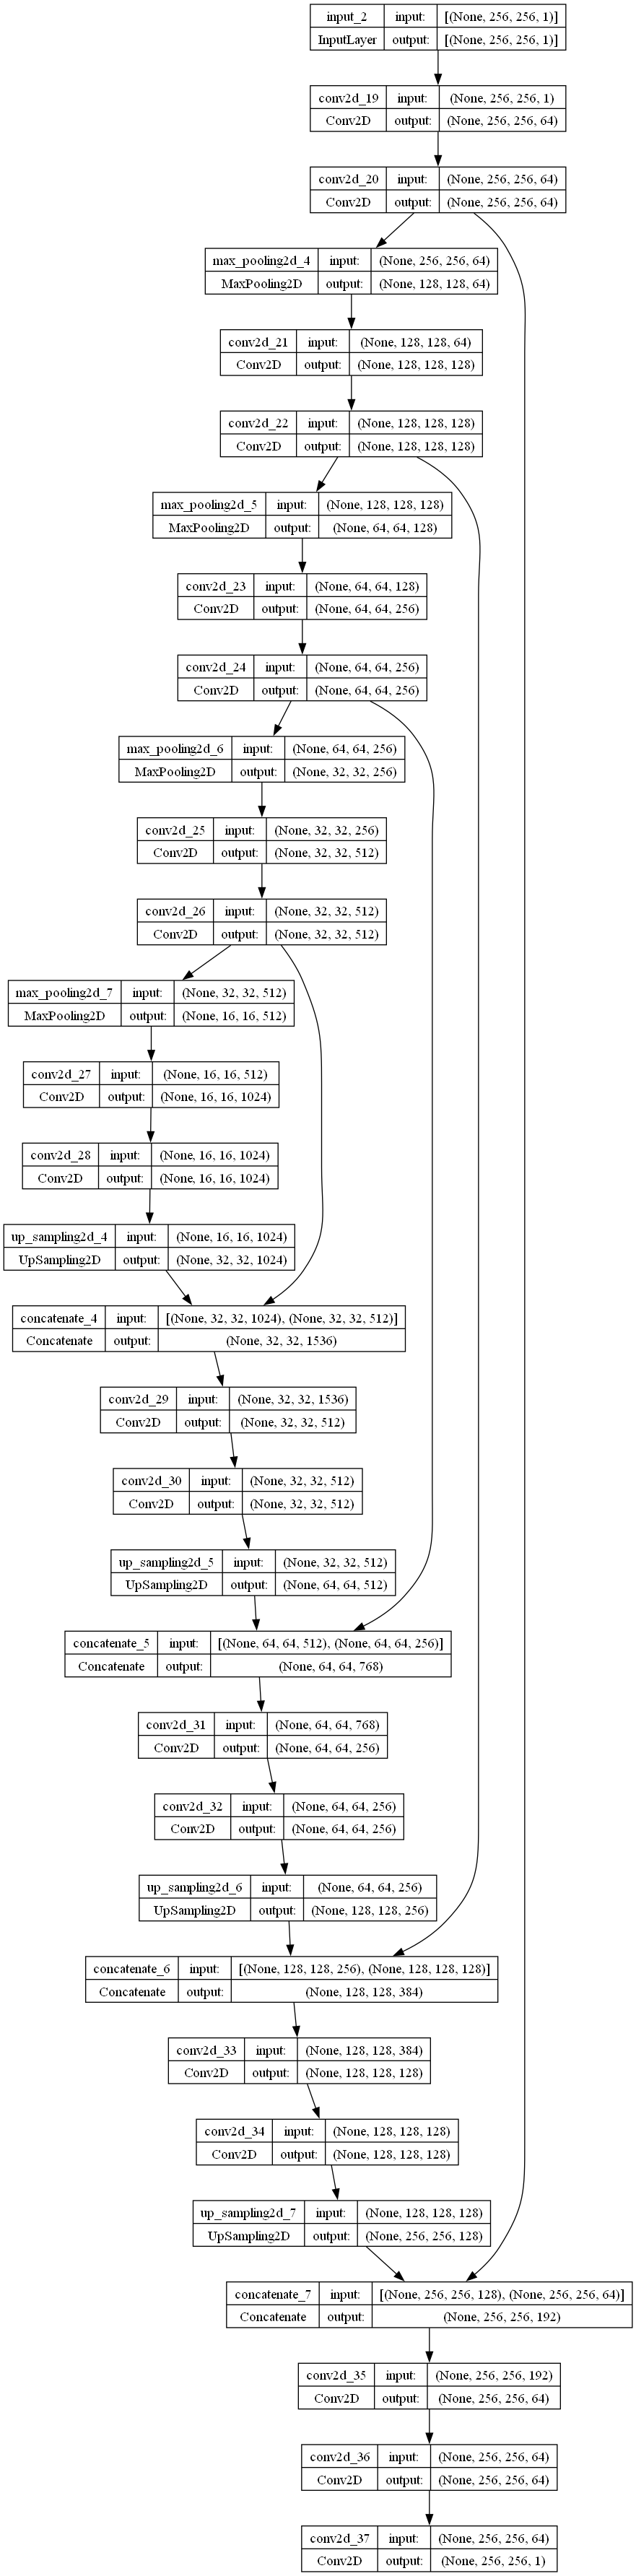

In [6]:
image_size = 256                    # Tamano de las imágenes
f = [64, 128, 256, 512, 1024]       # Numéro de capas convolucionales
activation = 'sigmoid'              # Función de activación
model = UNet( image_size, f , activation)  # Creación del modelo U-Net
keras.utils.plot_model(model, to_file='Images\model_plot.png', show_shapes=True, show_layer_names=True)